In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
# each layer depth (m)
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0330-12.dz.nc')
lev1 = data1.variables['dz'][:]/100

In [3]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-09.UVEL.nc')
plotvar = data.variables['UVEL'][0,:,:]
lont = data.variables['ULONG'][:516,430]
latt = data.variables['ULAT'][:516,430]

plotvar[plotvar == -0.009999999776482582]=0
plotvar[plotvar == -1.0]=0
where_are_nan = np.isnan(plotvar)
plotvar[where_are_nan] = 0

In [4]:
u = plotvar[:,:600,430]/100 # (m/s)
###################################
#####  volume transport
a = np.arange(0,515)
A1= np.zeros([62,516])
for j in a:
    A1[:,j] = u[:,j] * lev1[:] * (latt[j+1]-latt[j])*110.95 * 1000
#####unit (m^3/s)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/numpy/ma/core.py:1015: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [5]:
A1[A1>1000000000000000]=0

In [6]:
A1[:,-2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
final = np.nansum(A1)

In [12]:
final/1000000

142.85606431765402

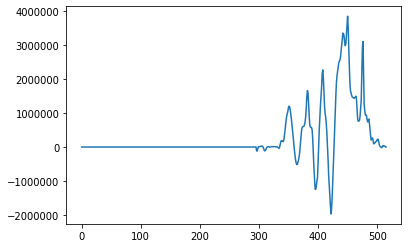

In [9]:
plt.plot(final)